<a href="https://colab.research.google.com/github/amruthab91/Machine_Learning/blob/main/Knn_diabetics_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Briefly Explain KNN in context of your problem**

---

KNN algorithm here is used to predict if the person is likely to get diabetes at particular age depending on the different features/parameters given(pregnancies, BMI, Glucose, Blood Pressure, Skin Thickness, Insulin).







**For the given Data, apply KNN classifcation algorithm and draw prediction error for various values of Neighbors.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
#loading the dataset
df=pd.read_csv("/content/diabetes.csv")

#print the first 5 rows of dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#shape of the dataframe
df.shape

(768, 9)

In [ ]:
#dividing the data into train and test set
X=df.drop('Outcome',axis=1).values
y=df['Outcome'].values

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42,stratify=y)


In [ ]:
from numpy.matrixlib import test
from sklearn import neighbors
#Load the model, for the data and predict
from sklearn.neighbors import KNeighborsClassifier

#setup arrays to store training and test accuracies
#neighbors=np.arange(1,9)
neighbors=np.arange(1,len(X_train),2)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [ ]:
"""
#knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=2)

#fit the model
knn.fit(X_train, y_train)

#compute accuracy on the training set
train_accuracy = knn.score(X_train, y_train)

#compute accuracy on test set
test_accuracy = knn.score(X_test,y_test)
"""

**Changing the number of neighbors from 1 to total number of neighbors and show the results in different charts.**

In [ ]:
max = 0
kIndex = 0
for i, k in enumerate(neighbors):

   knn = KNeighborsClassifier(n_neighbors=k)

   knn.fit(X_train, y_train)

   train_accuracy[i] = knn.score(X_train, y_train)

   test_accuracy[i] = knn.score(X_test, y_test)
   score = knn.score(X_test, y_test)
   if score > max:
    max = score
    kIndex = k
print(f'max accuracy {max} in K= {kIndex}')

   #print('train accuracy=\n',train_accuracy[i])
   #print(f'test accuracy={test_accuracy[i]} for k={k}')

max accuracy 0.7402597402597403 in K= 21


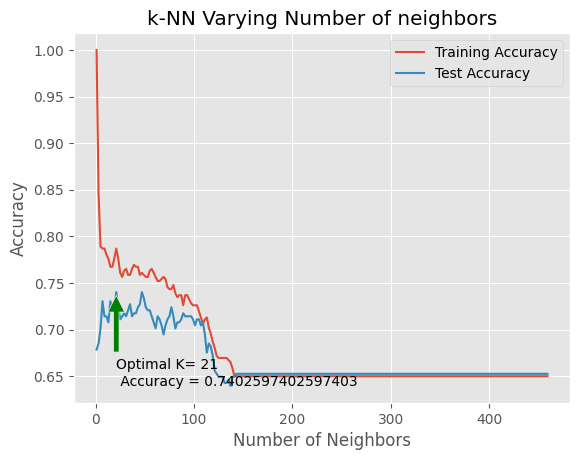

In [ ]:
plt.title('k-NN Varying Number of neighbors')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.plot(neighbors, test_accuracy,label='Test Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.annotate(f'Optimal K= {kIndex} \n Accuracy = {max}', (kIndex, max), xytext=(kIndex, max - 0.1), arrowprops=dict(facecolor='green', shrink=0.05))
plt.show()

In [ ]:
#setup knn classifier with k neighbors
OPTIMAL_NEIGHBOURS = kIndex
knn = KNeighborsClassifier(n_neighbors=OPTIMAL_NEIGHBOURS)

#fit the model
knn.fit(X_train,y_train)

#accuracy
knn.score(X_test,y_test)

0.7402597402597403

**The optimal value is obtained is 0.74for the K value is 21**

In [ ]:
%%shell
jupyter nbconvert --to html /content/2589545_Quiz_Knn.ipynb

[NbConvertApp] Converting notebook /content/2589545_Quiz_Knn.ipynb to html
[NbConvertApp] Writing 659268 bytes to /content/2589545_Quiz_Knn.html
